<b>Analysis 3 </b>

<b>Seasonal Pattern of Prices </b>

In [25]:
#Cleaning the data

import pandas as pd
import numpy as np
import re

calendarData=pd.read_csv("data/calendar.csv")

#replacing NaN values with 0
calendarData.fillna(0, inplace=True)
calendarData = calendarData[calendarData.price != 0]

#Extracting prices from the table
calendarprice = calendarData['price']
calendarprices=[]

for x in calendarprice:
    x = re.sub('[^0-9.]+','', x)
    calendarprices.append(float(x))
    
#replace the price column with the new column
calendarData['price']=calendarprices

calendarData = calendarData[calendarData.price >= 0]

#separating date column into day month and year
calendarData['Year'],calendarData['Month'],calendarData['Day']=calendarData['date'].str.split('-',2).str
calendarData.head()


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,Year,Month,Day
0,958,2020-04-08,f,115.0,$115.00,1.0,1125.0,2020,04,08
1,958,2020-04-09,f,115.0,$115.00,1.0,1125.0,2020,04,09
2,958,2020-04-10,f,115.0,$115.00,1.0,1125.0,2020,04,10
3,958,2020-04-11,f,115.0,$115.00,1.0,1125.0,2020,04,11
4,958,2020-04-12,f,115.0,$115.00,1.0,1125.0,2020,04,12


In [8]:
calendaryearData=calendarData.groupby(['Year','Month']).price.mean()
calendaryearData=calendaryearData.reset_index()
calendaryearData=calendaryearData.rename(columns={'price':'average_Price'})
calendaryearData['year-Month']=calendaryearData['Year'].map(str) + "-" + calendaryearData['Month'].map(str)
calendaryearData.to_csv('year_month_data.csv')
calendaryearData.head()

,Year,Month,average_Price,year-Month
0,2020,04,242.708559,2020-04
1,2020,05,248.308414,2020-05
2,2020,06,254.867105,2020-06
3,2020,07,260.387834,2020-07
4,2020,08,259.789240,2020-08


Text(0, 0.5, 'Average Price')

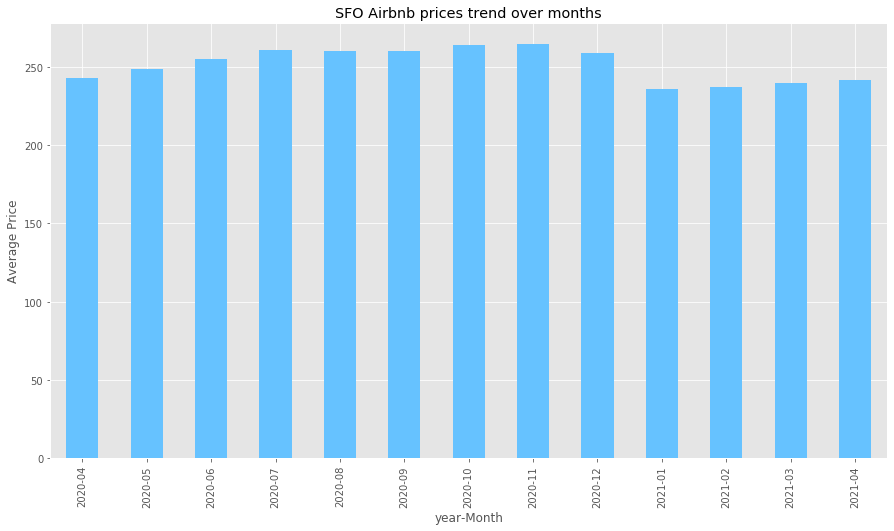

In [9]:
# visualizing the trend of year/Month and average prices of the listing

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

objects = calendaryearData['year-Month']
y_pos = calendaryearData['average_Price']

calendaryearData.plot(kind='bar', 
           x='year-Month',
           y='average_Price',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'SFO Airbnb prices trend over months', 
           legend = False)
plt.ylabel('Average Price')

In [10]:
#getting day name from date data and holidays

from datetime import date
import datetime
import calendar
import holidays

calendarData.fillna(0, inplace=True)
us_holidays = holidays.US()

calendarData['day_Name']='default'
calendarData['holiday']='False'
calendarData['us_holidays_name']='working'
for index,row in calendarData.iterrows():
    sdate = datetime.date(int(row['Year']),int(row['Month']),int(row['Day']))
    vall=date(int(row['Year']),int(row['Month']),int(row['Day'])) in us_holidays
    calendarData.set_value(index,'day_Name',calendar.day_name[sdate.weekday()])
    calendarData.set_value(index,'holiday',vall)
    calendarData.set_value(index,'us_holidays_name',us_holidays.get(sdate))
calendarData.to_csv('/Users/akanshajajodia/Desktop/projectdata/holidays_data.csv')
calendarData.head()

/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,Year,Month,Day,day_Name,holiday,us_holidays_name
0,958,2020-04-08,f,115.0,$115.00,1.0,1125.0,2020,04,08,Wednesday,False,None
1,958,2020-04-09,f,115.0,$115.00,1.0,1125.0,2020,04,09,Thursday,False,None
2,958,2020-04-10,f,115.0,$115.00,1.0,1125.0,2020,04,10,Friday,False,None
3,958,2020-04-11,f,115.0,$115.00,1.0,1125.0,2020,04,11,Saturday,False,None
4,958,2020-04-12,f,115.0,$115.00,1.0,1125.0,2020,04,12,Sunday,False,None


In [12]:
#calculating Average price for each day

calendardayData=calendarData.groupby('day_Name').price.mean()
calendardayData=calendardayData.reset_index()
calendardayData['day_num']=0

for index,row in calendardayData.iterrows():
    if row['day_Name']=='Monday':
        calendardayData.set_value(index,'day_num',1)
    if row['day_Name']=='Tuesday':
        calendardayData.set_value(index,'day_num',2)
    if row['day_Name']=='Wednesday':
        calendardayData.set_value(index,'day_num',3)
    if row['day_Name']=='Thursday':
        calendardayData.set_value(index,'day_num',4)
    if row['day_Name']=='Friday':
        calendardayData.set_value(index,'day_num',5)
    if row['day_Name']=='Saturday':
        calendardayData.set_value(index,'day_num',6)
    if row['day_Name']=='Sunday':
        calendardayData.set_value(index,'day_num',7)
calendardayData=calendardayData.sort_values('day_num',ascending=[1])
calendardayData=calendardayData.rename(columns={'price':'Average_Price'})
calendardayData

/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: set_val

,day_Name,Average_Price,day_num
1,Monday,250.899498,1
5,Tuesday,251.763527,2
6,Wednesday,250.998519,3
4,Thursday,251.106567,4
0,Friday,254.922354,5
2,Saturday,254.957037,6
3,Sunday,250.421803,7


[Text(0, 0.5, 'Average Price'), Text(0.5, 0, 'Days Of Week')]

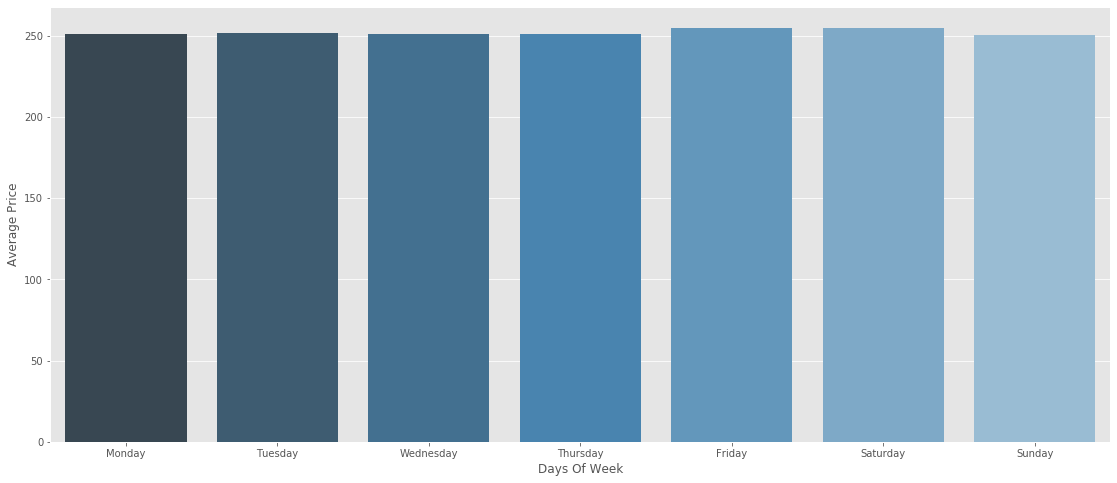

In [18]:

# visualizing the same
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(19,8))
ax = sns.barplot("day_Name", y="Average_Price", data=calendardayData,palette="Blues_d")
ax.set(xlabel='Days Of Week', ylabel='Average Price')



In [19]:

holidayData=calendarData.groupby('us_holidays_name').listing_id.count()
holidayData=holidayData.reset_index()
holidayData=holidayData.sort_values('listing_id',ascending=[0])
holidayData

,us_holidays_name,listing_id
0,Christmas Day,8138
1,Columbus Day,8138
2,Independence Day,8138
3,Independence Day (Observed),8138
4,Labor Day,8138
5,Martin Luther King Jr. Day,8138
6,Memorial Day,8138
7,New Year's Day,8138
8,Thanksgiving,8138
9,Veterans Day,8138


[Text(0, 0.5, 'Total Number of Listings'), Text(0.5, 0, 'US Holidays Name')]

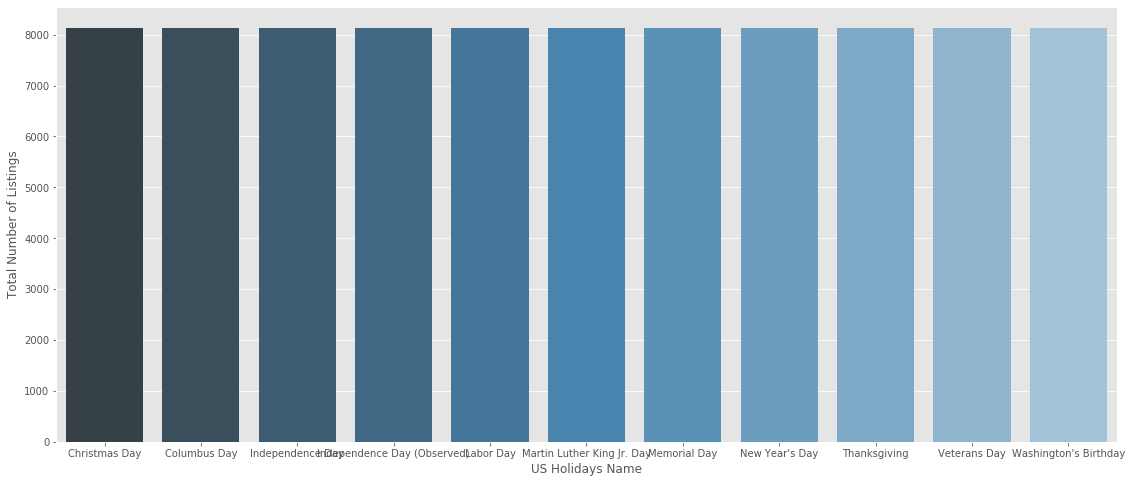

In [20]:
# visualizing the same
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(19,8))
ax = sns.barplot("us_holidays_name", y="listing_id", data=holidayData,palette="Blues_d")
ax.set(xlabel='US Holidays Name', ylabel='Total Number of Listings')

In [22]:
holidayPrice=calendarData.groupby('us_holidays_name').price.mean()
holidayPrice=holidayPrice.reset_index()
holidayPrice=holidayPrice.sort_values('price',ascending=[0])

holidayPrice.head(10)

,us_holidays_name,price
9,Veterans Day,286.786926
2,Independence Day,263.615507
3,Independence Day (Observed),263.067216
0,Christmas Day,262.861391
1,Columbus Day,260.935365
8,Thanksgiving,259.703367
4,Labor Day,256.630007
6,Memorial Day,247.185426
7,New Year's Day,239.056402
10,Washington's Birthday,234.870116


[Text(0, 0.5, 'Average Price'), Text(0.5, 0, 'US Holidays Name')]

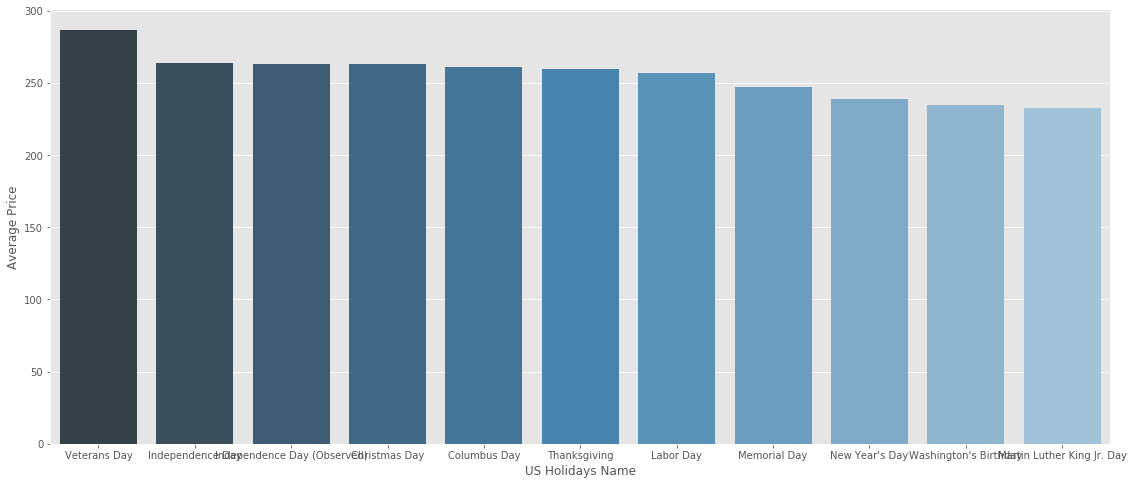

In [23]:
 #visualizing the same
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(19,8))
ax = sns.barplot("us_holidays_name", y="price", data=holidayPrice,palette="Blues_d")
ax.set(xlabel='US Holidays Name', ylabel='Average Price')

In [25]:
mergeredData=pd.merge(holidayData,holidayPrice,on='us_holidays_name')
mergeredData=mergeredData.rename(columns={'listing_id':'number_Of_Listings'})
mergeredData=mergeredData.rename(columns={'price':'average_Price'})
mergeredData

,us_holidays_name,number_Of_Listings,average_Price
0,Christmas Day,8138,262.861391
1,Columbus Day,8138,260.935365
2,Independence Day,8138,263.615507
3,Independence Day (Observed),8138,263.067216
4,Labor Day,8138,256.630007
5,Martin Luther King Jr. Day,8138,232.683583
6,Memorial Day,8138,247.185426
7,New Year's Day,8138,239.056402
8,Thanksgiving,8138,259.703367
9,Veterans Day,8138,286.786926


In [26]:
#analyzing data of september and october

checkHolidays=calendarData[(calendarData['Year'] == '2020') & ((calendarData['Month'] == '09') |(calendarData['Month'] == '10'))]
checkHolidays=checkHolidays.groupby(['Year','Month','holiday']).price.mean()
checkHolidays=checkHolidays.reset_index()
checkHolidays.head()

,Year,Month,holiday,price
0,2020,09,False,259.945767
1,2020,09,True,256.630007
2,2020,10,False,264.050983
3,2020,10,True,260.935365


In [28]:
#analyzing longweekednd holiday days

columbusDF=calendarDF[(calendarDF['Year'] == '2020') & (calendarDF['Month'] == '10' ) & ((calendarDF['Day'] == '08') | (calendarDF['Day'] == '09') | (calendarDF['Day'] == '10'))]
columbusDF.groupby('Month').price.mean()

Month
10    257.573165
Name: price, dtype: float64

In [30]:
#analyzing rest of the days

NocolumbusData=calendarData[(calendarData['Year'] == '2020') & (calendarData['Month'] == '10' ) & ((calendarData['Day'] != '08') | (calendarData['Day'] != '09') | (calendarData['Day'] != '10'))]
NocolumbusData.groupby('Month').price.mean()

Month
10    263.950479
Name: price, dtype: float64

In [31]:
# analyzing data from date 5th of October to date 13th of October which includes both long weekend and normal workdays

octData=calendarData[(calendarData['Year'] == '2020') & (calendarData['Month'] == '10' )& ((calendarData['Day'] == '05' )| (calendarData['Day'] == '06' )| (calendarData['Day'] == '07' )| (calendarData['Day'] == '08' )| (calendarData['Day'] == '09' )| (calendarData['Day'] == '10' )| (calendarData['Day'] == '10' )| (calendarData['Day'] == '11' )| (calendarData['Day'] == '12' )| (calendarData['Day'] == '13' ))]
octData=octData.groupby('Day').price.mean()
octData=octData.reset_index()
octData=octData.sort_values('Day',ascending=[1])
octData=octData.rename(columns={'price':'Average_Price'})
octData.head(10)

,Day,Average_Price
0,05,264.440649
1,06,264.368518
2,07,264.530966
3,08,263.873925
4,09,268.119194
5,10,267.381298
6,11,261.657410
7,12,260.935365
8,13,260.939912


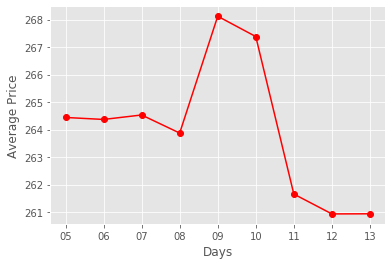

In [32]:
import numpy as np
import matplotlib.pyplot as plt

x=octData['Day'].tolist()
y=octData['Average_Price'].tolist()

plt.plot(x,y, 'ro-')
plt.ylabel('Average Price')
plt.xlabel('Days')
plt.show()